## Principal Component analysis - Singular Value Decomposition

We will be implementing PCA or Principal Component analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)

In [2]:
def draw_scatter_plot(x, y, limits):
    f, ax = plt.subplots()
    plt.scatter(x, y, marker='x')
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    plt.gca().set_aspect('equal', adjustable='box')

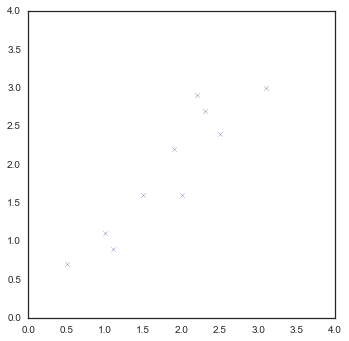

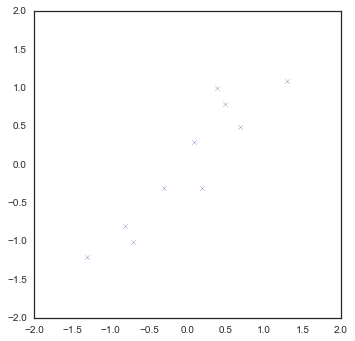

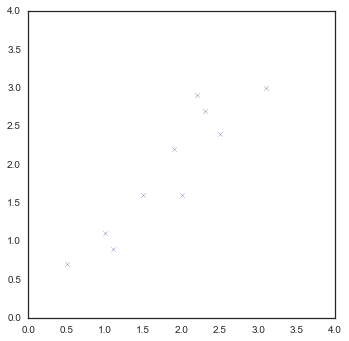

In [11]:
x = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1]
y = [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
draw_scatter_plot(x, y, [0, 4])
plt.show()

In [12]:
data = list(zip(x, y))
data = pd.DataFrame(data=data, columns=['x', 'y'])

## Subtract the mean
For PCA to work properly, we need to subtract the mean from each of the data dimensions.

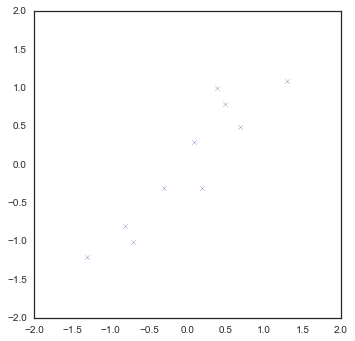

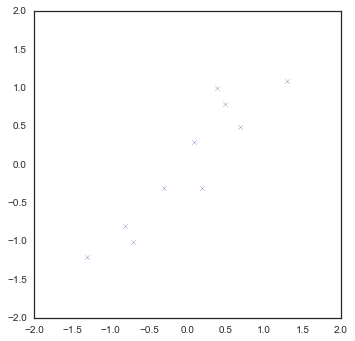

In [14]:
adjusted_data = data - data.mean(axis=0)
draw_scatter_plot(adjusted_data['x'], adjusted_data['y'], [-2, 2])
plt.show()

## Calculate the co-variance matrix
Standard deviation and variance only operate on 1 dimension, so that we can only calculate the standard deviation for each dimension of the data set independently of the other dimensions. However, it is useful to have a similar measure to find out how much the dimensions vary from the mean with respect to each other.
Covariance is such a measure. Covariance is always measured between 2 dimensions.
Since the data is 2 dimensional, the covariance matrix will be 2 X 2.

In [15]:
covariance_matrix = adjusted_data.cov()
covariance_matrix

,x,y
x,0.616556,0.615444
y,0.615444,0.716556


## Calculating eigenvectors of the matrix
Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data.

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvectors

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [17]:
eigenvalues

array([ 0.0490834 ,  1.28402771])

In [18]:
eigenvector_1 = eigenvectors[:,0]
slope_1 = eigenvector_1[0] / eigenvector_1[1]
eigenvector_1

array([-0.73517866,  0.6778734 ])

In [19]:
eigenvector_2 = eigenvectors[:,1]
slope_2 = eigenvector_2[0] / eigenvector_2[1]
eigenvector_2

array([-0.6778734 , -0.73517866])

Let's draw the eigenvectors

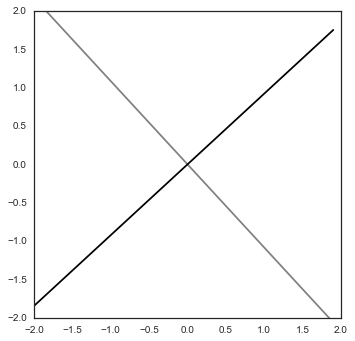

In [20]:
f, ax = plt.subplots()
X = np.arange(-2.0, 2.0, 0.1)
plt.plot(X, X * slope_1, 'gray')
plt.plot(X, X * slope_2, 'black')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Feature vector
The eigenvector with the highest eigenvalue is the principle component of the data set. In general, once eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue, highest to lowest.
We can decide to ignore the components of lesser significance. Of course, we lose some information, but if the eigenvalues are small, not much is lost. If we leave out some components, the final data set will have less dimensions than the original. To be precise, if you originally have n dimensions in your data, and so you calculate n eigenvectors and eigenvalues, and then you choose only the first p eigenvectors, then the final data set has only p dimensions.
Feature vector is just a fancy name for a matrix of vectors. This is constructed by taking the eigenvectors that you want to keep from the list of eigenvectors, and forming a matrix with these eigenvectors in the columns.

In [21]:
feature_vector_reduced = eigenvectors[:, np.argmax(eigenvalues)]
feature_vector_reduced

array([-0.6778734 , -0.73517866])

In [22]:
feature_vector_full = eigenvectors

In [23]:
trasformed_data_full = np.dot(feature_vector_full.T, adjusted_data.T)

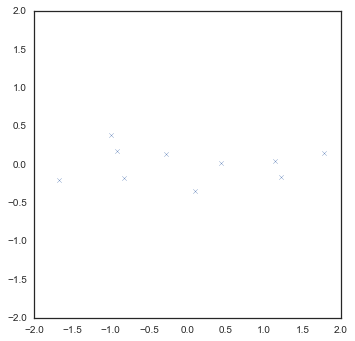

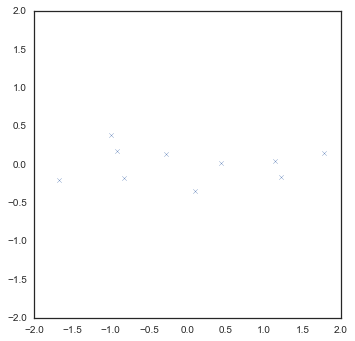

In [25]:
trasformed_data_full[1] # x
trasformed_data_full[0] # y

draw_scatter_plot(trasformed_data_full[1], trasformed_data_full[0], [-2, 2])
plt.show()

In [26]:
trasformed_data_reduced = np.dot(feature_vector_reduced.T, adjusted_data.T)
trasformed_data_reduced

array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

This data is exactly the first column of the other one.

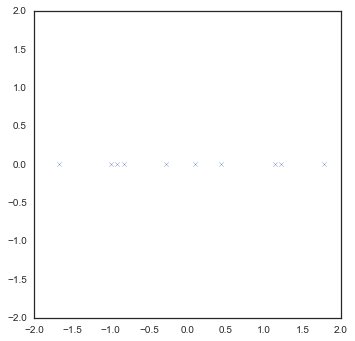

In [27]:
draw_scatter_plot(trasformed_data_reduced, [0] * len(trasformed_data_reduced), [-2, 2])
plt.show()

## Conclusions
We conclude that the data is in patterns that are the lines that most closely describe the relationships between the data.